Retail Sales Analysis

In [4]:
import pandas as pd
import numpy as np

In [5]:
ss_df = pd.read_csv('SuperStoreOrders_Project1.csv')

In [6]:
ss_df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2/1/2011,6/1/2011,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,3/1/2011,3/1/2011,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,3/1/2011,9/1/2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,3/1/2011,7/1/2011,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.0,253.320,81.26,High,2011


In [7]:
ss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [8]:
ss_df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


Data Cleaning and Preprocessing

In [9]:
#Dropping columns
ss_df.drop(['ship_date', 'ship_mode', 'customer_name','segment', 'state', 'order_priority'],axis=1,inplace=True)

In [10]:
#Converting to Date format
ss_df['order_date'] = pd.to_datetime(ss_df['order_date'], dayfirst=True, errors = 'coerce')

In [11]:
#Converting sales to numeric format
ss_df['sales'] = pd.to_numeric(ss_df['sales'],errors='coerce')

In [12]:
#Handling Missing or null values
#check missing or null values
ss_df.isnull().sum()

order_id             0
order_date       31223
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
year                 0
dtype: int64

In [13]:
#Dropping null date rows
ss_df.dropna(subset=['order_date'],inplace=True)

In [14]:
#Filling sales null values to 0
ss_df['sales'] = ss_df['sales'].fillna(0)

In [15]:
#Additional Features
ss_df['total_revenue'] = ss_df['quantity'] * ss_df['sales']
ss_df['profit_margin'] = (ss_df['profit']/ss_df['sales']) * 100 
ss_df['order_weekday'] = ss_df['order_date'].dt.day_name()
ss_df['order_month'] = ss_df['order_date'].dt.month

In [16]:
ss_df['order_quarter'] = ss_df['order_date'].dt.quarter
ss_df['profit_per_item'] = ss_df['profit']/ss_df['quantity'] 
ss_df['shipping_cost_per_item'] = ss_df['shipping_cost']/ss_df['quantity'] 
ss_df['discount_amount'] = ss_df['sales'] * ss_df['discount'] 
ss_df['discount_percent'] = ss_df['discount'] * 100

In [17]:
#Replace infinity values to None
ss_df['profit_margin'] = ss_df['profit_margin'].replace([np.inf,-np.inf],np.nan)

In [18]:
#Filling sales null values to 0
ss_df['profit_margin'] = ss_df['profit_margin'].fillna(0)

In [19]:
#Check duplicate rows
ss_df.duplicated().sum()

0

In [48]:
ss_df.columns

Index(['order_id', 'order_date', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'year', 'total_revenue',
       'profit_margin', 'order_weekday', 'order_month', 'order_quarter',
       'profit_per_item', 'shipping_cost_per_item', 'discount_amount',
       'discount_percent'],
      dtype='object')

In [21]:
#Export dataframe to csv
ss_df.to_csv('New_superstore_Project1.csv', index=False, header=True, float_format = '%.2f')

Exploratory Data Analysis

Total Sale Generated

In [22]:
#Total Revenue
total_sales = ss_df['sales'].sum()
total_sales

3075011.0

Sales generated Annualy, Quaterly, Monthly, Country and Categorical

In [23]:
#Sales by year, quarter, month, region, category
sale_by_year = ss_df.groupby('year')['sales'].sum()
sale_by_quarter = ss_df.groupby('order_quarter')['sales'].sum()
sale_by_month = ss_df.groupby(['year','order_month'])['sales'].sum()
sale_by_country = ss_df.groupby('country')['sales'].sum()
sale_by_category = ss_df.groupby('category')['sales'].sum()
sale_by_region = ss_df.groupby('region')['sales'].sum()

In [24]:
sale_by_month = ss_df.groupby(['year','order_month'])['sales'].sum()
sale_by_month = sale_by_month.reset_index()
pivot_table = sale_by_month.pivot(index='order_month', columns='year', values='sales')
pivot_table

year,2011,2012,2013,2014
order_month,,,,
1,25344.0,27375.0,43887.0,42773.0
2,26445.0,25181.0,44313.0,43302.0
3,35909.0,34480.0,50552.0,56147.0
4,30751.0,41412.0,52941.0,55872.0
5,35408.0,48929.0,56241.0,74178.0
6,59353.0,66334.0,91072.0,104566.0
7,26944.0,38685.0,67080.0,68087.0
8,57257.0,58041.0,72733.0,111635.0
9,56111.0,73634.0,91153.0,130067.0


Total Units sold

In [25]:
total_units = ss_df['quantity'].sum()
total_units

69449

Units sold by country and category

In [26]:
units_by_country = ss_df.groupby('country')['quantity'].sum()
units_by_category = ss_df.groupby('category')['quantity'].sum()
units_by_sub_category = ss_df.groupby('sub_category')['quantity'].sum()

Average Profit margin for each Category and Region

In [27]:
#average Profit margin
avg_profit_margin_by_category = ss_df.groupby('category')['profit_margin'].mean()
avg_profit_margin_by_subcategory = ss_df.groupby('sub_category')['profit_margin'].mean()
avg_profit_margin_by_region = ss_df.groupby('region')['profit_margin'].mean()

In [28]:
avg_profit_margin_by_category = avg_profit_margin_by_category.reset_index()

Profit margin with and without discounts

In [29]:
with_discount = ss_df[ss_df['discount'] > 0]
without_discount = ss_df[ss_df['discount'] == 0]

profit_margin_with_discount = with_discount.groupby('category')['profit_margin'].mean()
profit_margin_without_discount = without_discount.groupby('category')['profit_margin'].mean()
print(profit_margin_with_discount)

category
Furniture         -19.777933
Office Supplies   -28.340299
Technology        -18.001539
Name: profit_margin, dtype: float64


Relation between discount and sales/profits

In [30]:
#Correaltion between discount and sales/profits
discount_sales_correlation = ss_df['discount'].corr(ss_df['sales'])
discount_profits_correlation = ss_df['discount'].corr(ss_df['profit'])

print(f"{discount_sales_correlation:.2f}")
print(f"{discount_profits_correlation:.2f}")

-0.10
-0.32


Sub Category Products Underperforming without Discounts

In [31]:
underperforming_subcategory_products = without_discount.groupby('sub_category').agg({'quantity': 'sum', 'profit_margin': 'mean'}).reset_index()
underperforming_subcategory_products

,sub_category,quantity,profit_margin
0,Accessories,2806,24.431471
1,Appliances,1358,20.822754
2,Art,4473,25.593643
3,Binders,4608,28.121344
4,Bookcases,1464,20.314305
5,Chairs,1703,22.334956
6,Copiers,1203,17.963317
7,Envelopes,2126,27.893952
8,Fasteners,2027,26.222325
9,Furnishings,2520,27.584978


Quaterly and Yearly sales/profits trend

In [32]:
yearly_trend = ss_df.groupby('year')[['sales','profit']].sum()
quarterly_trend = ss_df.groupby(['year','order_quarter'])[['sales','profit']].sum()
yearly_trend

,sales,profit
year,,
2011,551280.0,113534.53686
2012,641491.0,117606.90596
2013,847235.0,169899.98282
2014,1035005.0,176650.86456


Yearly Sales and Profit Growth rate

In [33]:
yearly_growth = ss_df.groupby('year')['sales'].sum().pct_change() * 100
yearly_growth.reset_index()
yearly_growth = pd.DataFrame(yearly_growth)
yearly_growth['profits_growth'] = ss_df.groupby('year')['profit'].sum().pct_change() * 100

In [34]:
#print(yearly_profits_growth_rate)
yearly_growth['sales']= yearly_growth['sales'].fillna(0)
yearly_growth['profits_growth']= yearly_growth['profits_growth'].fillna(0)

Data Visualization

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
matplotlib.rcParams['figure.figsize'] = (4, 3)

Total Revenue

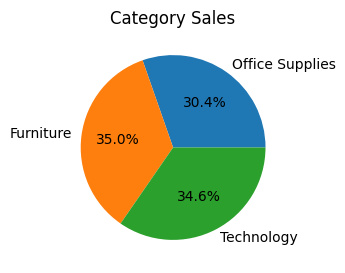

In [37]:
plt.pie(sale_by_category, labels = ss_df['category'].unique(),autopct = '%1.1f%%')
plt.title('Category Sales')
plt.show()

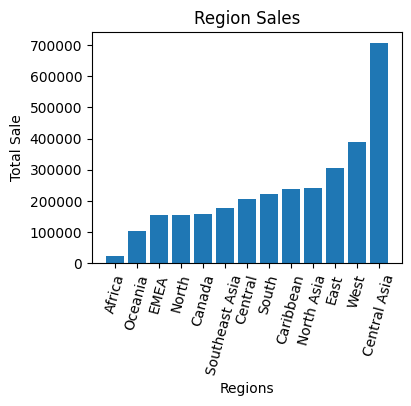

In [38]:
plt.bar(ss_df['region'].unique(),sale_by_region.sort_values())
plt.xlabel('Regions')
plt.ylabel('Total Sale')
plt.xticks(rotation=75)
plt.title('Region Sales')
plt.show()

Monthly Revenue

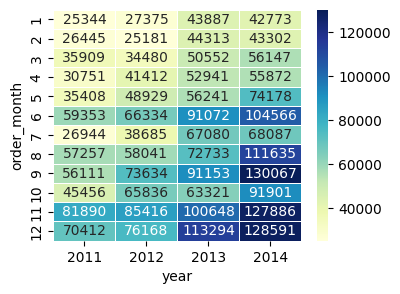

In [39]:
#plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5);

Sub Catergory Units sold 

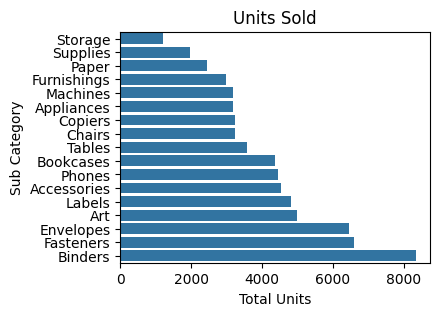

In [40]:
sns.barplot(y=ss_df['sub_category'].unique(),x=units_by_sub_category.sort_values())
plt.xlabel('Total Units')
plt.ylabel('Sub Category')
plt.title('Units Sold');
#plt.show()

Profit margin across categories

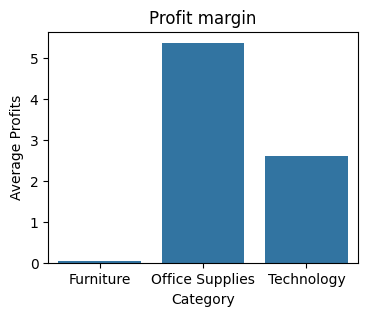

In [41]:
sns.barplot(x='category',y='profit_margin', data=avg_profit_margin_by_category)
plt.xlabel('Category')
plt.ylabel('Average Profits')
plt.title('Profit margin');

Discounts and Profit margin Relation

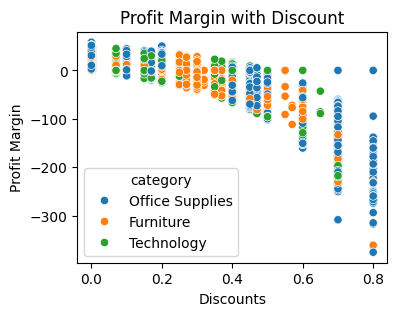

In [42]:
sns.scatterplot(data=ss_df, x='discount', y='profit_margin',hue='category')
plt.xlabel('Discounts')
plt.ylabel('Profit Margin')
plt.title('Profit Margin with Discount');

Discounts and Sales Relation

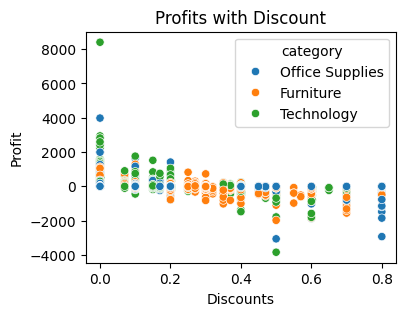

In [43]:
sns.scatterplot(data=ss_df, x='discount', y='profit',hue='category')
plt.xlabel('Discounts')
plt.ylabel('Profit')
plt.title('Profits with Discount');

Under Performed Sub categories

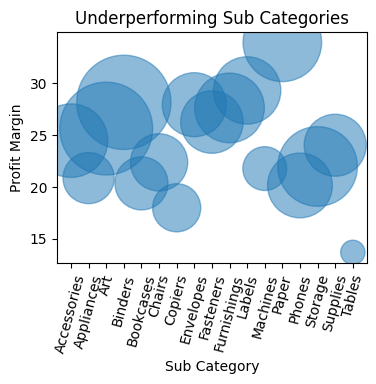

In [44]:
plt.scatter(data=underperforming_subcategory_products, x='sub_category', y='profit_margin', s='quantity',alpha = 0.5)
plt.xticks(rotation=75)
plt.xlabel('Sub Category')
plt.ylabel('Profit Margin')
plt.title('Underperforming Sub Categories');

Yearly Sales and Profits

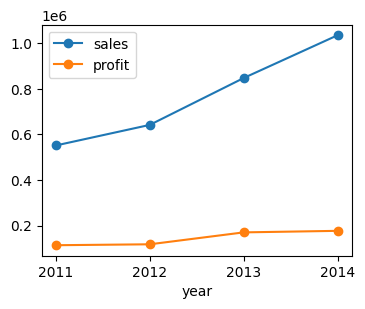

In [45]:
yearly_trend.plot(kind='line', marker='o')
plt.xticks(ticks=[2011, 2012, 2013, 2014]);

Yearly Business growth

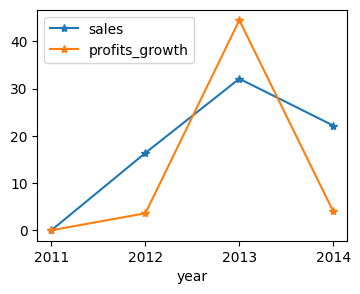

In [46]:
yearly_growth.plot(kind='line', marker='*')
plt.xticks(ticks=[2011, 2012, 2013, 2014]);